Import the libraries we need for the lab


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from math import sqrt
import statsmodels.api as sm

Read in the csv file from the url using the request library


In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df.drop('Unnamed: 0', axis = 1, inplace = True)
boston_df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,4.98,24.0


# Task 4: Generate Descriptive Statistics and Visualizations
Generate the following and explain your findings:

1. For the "Median value of owner-occupied homes" provide a boxplot

2. Provide a  bar plot for the Charles river variable

3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

5. Create a histogram for the pupil to teacher ratio variable

#### 4.1 Boxplot for demonstrating Median value of owner-occupied homes in $1000's within Dataframe.


Text(0.5, 1.0, "Median value of owner-occupied homes in $1000's")

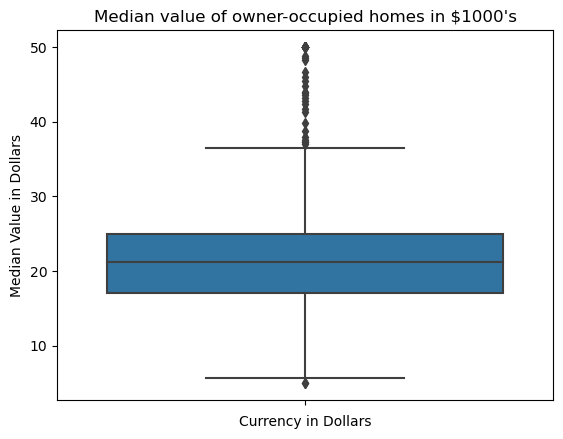

In [5]:
# Boxplot for "Median value of owner-occupied homes"
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set_xlabel("Currency in Dollars")
ax.set_ylabel("Median Value in Dollars")
ax.set_title("Median value of owner-occupied homes in $1000's")

#### 4.2 Bar plot for showing the count of the Charles river variable.

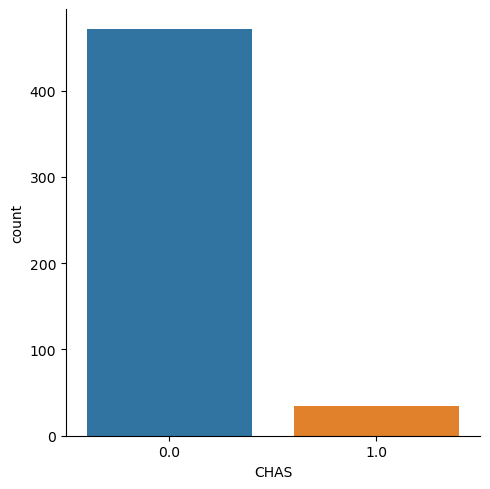

In [6]:
#  Bar plot for the Charles river variable

ax = sns.catplot(x='CHAS', kind='count', data=boston_df)

#### 4.3 For plotting the relationship between Median-Value and Age through Box Plot.

In [7]:
# Boxplot for the MEDV variable vs the AGE variable

boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'

Text(0.5, 1.0, 'Boxplot for AGE Vs MEDIAN-VALUE')

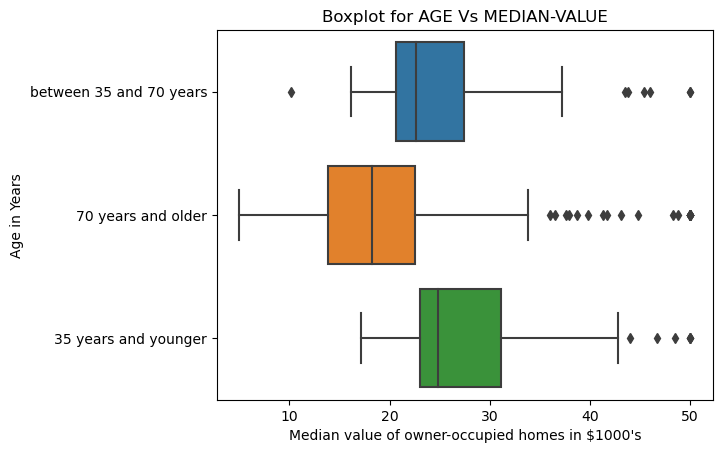

In [8]:
ax = sns.boxplot(x="MEDV", y="AGE_GROUP", data=boston_df)
ax.set_xlabel("Median value of owner-occupied homes in $1000's")
ax.set_ylabel("Age in Years")
ax.set_title("Boxplot for AGE Vs MEDIAN-VALUE")

#### 4.4 Scatterplot between Nitric oxide concentrations and the proportion of non-retail business acres per town.


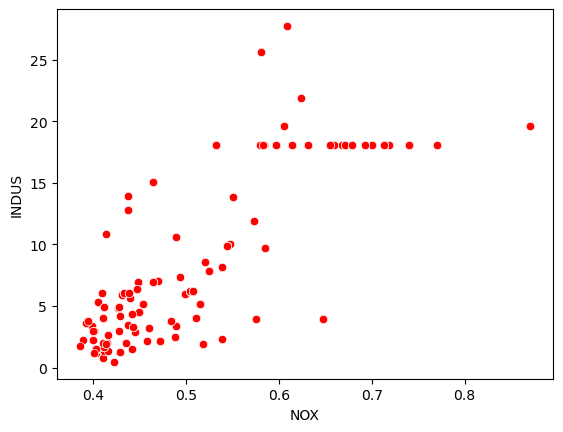

In [9]:
# scatter plot for NOX Vs INDUS

ax = sns.scatterplot(x='NOX', y='INDUS',data=boston_df, color = "r")

#### 4.5 Histogram for the pupil to teacher ratio

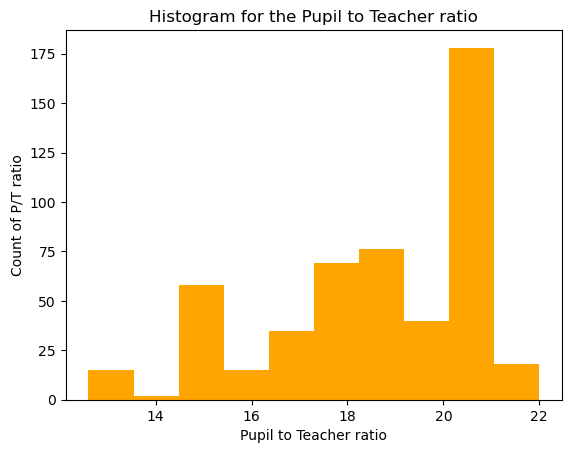

In [10]:
# Histogram for the pupil to teacher ratio by matplotlib

plt.hist(boston_df['PTRATIO'], color = "orange")
plt.xlabel("Pupil to Teacher ratio")
plt.ylabel("Count of P/T ratio")
plt.title("Histogram for the Pupil to Teacher ratio")
plt.show()

Text(0.5, 1.0, 'Histogram for the Pupil to Teacher ratio')

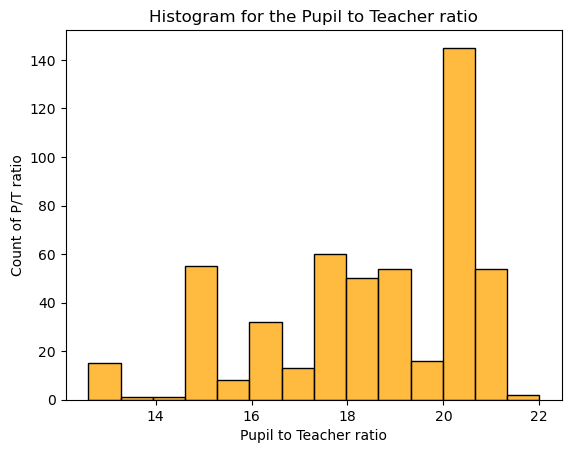

In [11]:
# Histogram for the pupil to teacher ratio by seaborn


ax = sns.histplot(x="PTRATIO", data=boston_df, color = "orange")
ax.set_xlabel("Pupil to Teacher ratio")
ax.set_ylabel("Count of P/T ratio")
ax.set_title("Histogram for the Pupil to Teacher ratio")

# Task 5: Use the appropriate tests to answer the questions provided.

For each of the following questions;

1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

#### 5.1 T-Test: Is there a significant difference in median value of houses bounded by the Charles river or not?


State the hypothesis

*   $H0: µ1 = µ2$ ("there is no difference in median value of houses bounded by the Charles river")
*   $H1: µ1 ≠ µ2$ ("there is a difference in median value of houses bounded by the Charles river")


In [14]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1 ]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0 ]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since the p-value is not greater than 0.05 we cannot assume equality of variance

In [16]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1 ]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0 ]['MEDV'], equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river.


#### 5.2 ANOVA-Test: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?


State the hypothesis

*   $H0: µ1 = µ2 = µ3$ (the three age means are equal)
*   $H1:$ At least one of the means differ

In [17]:
scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Since the p-value is greater than 0.05, the variance is equal.

In [18]:
thirtyfive_lower = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

In [19]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.


#### 5.3 Pearson Correlation-Test: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

State the hypothesis:

*   $H0:$ NOX concentrations are not correlated with proportion of non-retail business acres per town
*   $H1:$ NOX concentrations are correlated with proportion of non-retail business acres per town


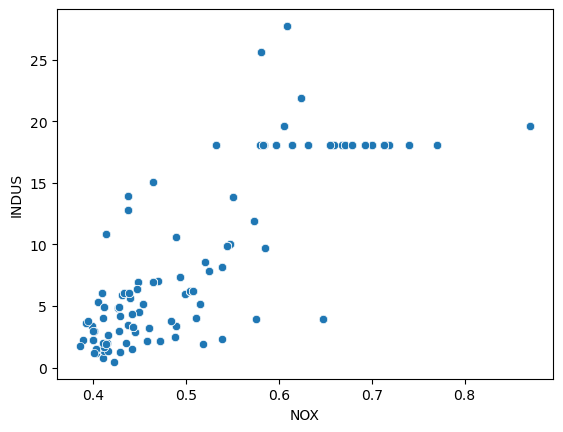

In [20]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

In [21]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061238693e-98)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


#### 5.4 Regression analysis: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

In [23]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           1.21e-08
Time:                        18:15:52   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** p < 0.05 there is evidence of correlation between additional weighted distance to the five Boston employment centres and the median value of owner occupied homes.